In [1]:
#import necessary libraries
import ipywidgets as widgets
import numpy as np
import pandas as pd
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from xml.dom import minidom

import numpy as np
from scipy import interpolate
import pylab as pl

from plotly.offline import init_notebook_mode, iplot
from IPython.display import display, HTML
import numpy as np

from ipywidgets import *
from IPython.display import display

np.set_printoptions(threshold=np.inf)

#initializations
init_notebook_mode(connected=True)

In [2]:
#import data
filename = '20180808_Test_3'
# filename = '20180622_Test_2'
findLabel = 'Packet'
SensorData = None
time = 0

#import xml-file
xDoc = minidom.parse(filename + ".xml")
allListitems = xDoc.getElementsByTagName(findLabel) 

for s in allListitems:
    if SensorData is None:
        SensorData = s.attributes['Samples'].value.split(',')
    else:
        SensorData = np.append(SensorData, s.attributes['Samples'].value.split(','))

#import csv-file
ForceData = pd.read_csv(filename + ".csv",delimiter=',')
# column_cssj = column_cssj.set_index("State", drop = False)

In [3]:
len(SensorData)

1904

In [4]:
len(ForceData["cssj"][1:])

2422

In [25]:
#create figure
figure = {
    'data': [],
    'layout': {},
    #'frames': [],
}

In [73]:
def update_plot(timemult,valuemult,valueoffset,timeoffset):
    print ("timemult: ", timemult,)
    print ("timeoffset: ", timeoffset,)
    print ("valuemult: ", valuemult, )
    print ("valueoffset: ", valueoffset)
    
    #assign data
    trace1 = go.Scattergl(
        x = np.linspace(0, (len(SensorData)-1)/10, num=len(SensorData)),
        y = SensorData,
        name =" Sensor Data",
        mode = 'line',
        marker = dict(
        color = 'blue',
#         line = dict(width = 1)
    )
        )

    trace2 = go.Scattergl(
        x =  ForceData['cstm']*timemult+timeoffset,
        y =  ForceData['cssj']*valuemult+valueoffset,
        name = "Force Data",
         mode = 'line',
        marker = dict(
        color = 'red',
#         line = dict(width = 1)
    )
        )
    
    figure['data'] =[trace1,trace2]
    
    #set layout
    figure['layout'] = {
        'title': 'Data',
            'xaxis': {'title': 'Time [s]'},
            'yaxis': {'title': 'Sensor Data (mV)'}}
    
    #draw plot
    iplot(figure, filename='axes-booleans')

In [74]:
widgets.interact(
    update_plot,

    #create sliders
    timemult = widgets.FloatSlider(
        value=0.393,
        min=0.390,
        max=0.400,
        step=0.001,
        continuous_update = False),
    
     timeoffset = widgets.FloatSlider(
        value=0,
        min=-10,
        max=10,
        step=0.1,
        continuous_update = False),

    valuemult = widgets.FloatSlider(
        value=55,
        min=1,
        max=200,
        step=1,
        continuous_update = False),

    valueoffset = widgets.FloatSlider(
        value=1900,
        min=1000,
        max=3000,
        step=5,
        continuous_update = False),
)

interactive(children=(FloatSlider(value=0.393, continuous_update=False, description='timemult', max=0.4, min=0…

<function __main__.update_plot(timemult, valuemult, valueoffset, timeoffset)>

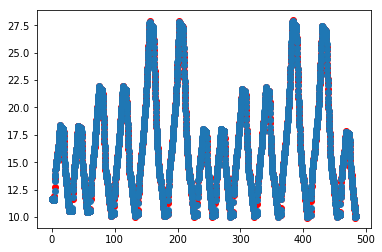

In [39]:
#!/usr/bin/env python
# -*-coding:utf-8 -*-
import numpy as np
from scipy import interpolate
import pylab as pl
 
x = ForceData["cstm"][1:].values
y = ForceData["cssj"][1:].values

xnew = ForceData["cstm"][1:len(SensorData)].values.astype(float)*1.272
pl.plot(x,y,"ro")
 
f=interpolate.interp1d(x,y)
ynew=f(xnew)
pl.plot(xnew,ynew,'o')
pl.show()

In [168]:
#assign data
trace0 = go.Scattergl(
        x = ynew[0:],
        y = SensorData[3:],
        name ="xy",
        mode = 'lines',
        line=dict(
            width=1, color='blue'
        )
)

xUp=[]
xDown=[]
yUp=[]
yDown=[]

for i in range(len(ynew)-1):
    if ynew[i] < ynew[i+1] and SensorData[i] < SensorData[i+1]:
        xUp.append(ynew[i+1])
        yUp.append(SensorData[i+1])
        
#     elif x[0][i] > x[0][i+1] and y[0][i] > y[0][i+1]:
#         xDown.append[x[0][i+1]]
#         YDown.append[x[0][i+1]]

traceUp = go.Scattergl(
        x = xUp,
        y = yUp,
        name ="Up",
        mode = 'markers',
        marker=dict(
            size=5, color='Green'
        )
)
data = [trace0, traceUp]
iplot(data, filename='scatter')

In [156]:
ynew[0]

11.68

In [154]:
len(SensorData[1:])

1903

In [136]:
y

array([11.68, 11.68, 11.66, 11.68, 11.68, 11.66, 11.66, 11.68, 11.66,
       11.59, 11.57, 11.57, 11.57, 11.57, 11.53, 11.59, 11.57, 11.53,
       11.59, 11.55, 11.57, 11.91, 12.71, 13.34, 13.68, 13.77, 13.75,
       13.81, 13.84, 14.24, 14.44, 14.46, 14.44, 14.6 , 14.71, 14.82,
       15.09, 15.14, 15.11, 15.18, 15.31, 15.34, 15.52, 15.63, 15.61,
       15.83, 15.87, 15.9 , 16.05, 16.28, 16.3 , 16.35, 16.48, 16.48,
       16.57, 16.79, 16.95, 17.06, 17.29, 17.47, 17.62, 17.74, 17.87,
       17.96, 18.09, 18.23, 18.32, 18.38, 18.32, 18.25, 18.23, 18.14,
       18.17, 18.14, 18.16, 18.14, 18.14, 18.14, 18.14, 18.12, 18.12,
       18.12, 18.12, 18.12, 18.09, 18.07, 18.05, 18.  , 18.05, 18.03,
       18.05, 18.03, 18.03, 17.96, 17.76, 17.35, 16.95, 16.52, 16.19,
       15.83, 15.43, 15.11, 14.82, 14.69, 14.33, 14.08, 14.08, 14.04,
       13.88, 13.92, 13.84, 13.52, 13.45, 13.34, 13.27, 13.05, 13.03,
       12.78, 12.67, 12.58, 12.49, 12.45, 12.51, 12.29, 12.02, 11.91,
       11.71, 11.57,

In [82]:
    #assign data
trace0 = go.Scattergl(
        x = ynew[0:],
        y = SensorData[3:],
        name ="xy",
        mode = 'lines',
        line=dict(
            width=1, color='blue'
        )
)
data = [trace0]

iplot(data, filename='scatter')

In [12]:
trace0 = go.Scattergl(
        x = ynew[0:],
        y = SensorData[3:],
        name ="xy",
        mode = 'lines',
        line=dict(
            width=1, color='blue'
        )
)
data2 = [trace0,trace0]

layout2=dict(
            title='Anime Test', hovermode='closest',
            updatemenus= [{'type': 'buttons',
                           'buttons': [{'label': 'Play',
                                        'method': 'animate',
                                        'args': [None]}]}])

M = (len(SensorData)-3)//10
x2 = ynew[0::10]
y2 = SensorData[3::10]
frames2=[dict(data=[dict(x=[x2[k]], 
                        y=[y2[k]], 
                        mode='markers', 
                        marker=dict(color='red', size=10)
                        )
                  ]) for k in range(M)]  

# steps = []
# for i in range(len(data)):
#     step = dict(
#         method = 'restyle',  
#         args = ['visible', [False] * len(data)],
#     )
#     step['args'][1][i] = True # Toggle i'th trace to "visible"
#     steps.append(step)

# sliders = [dict(
#     active = 10,
#     currentvalue = {"prefix": "Frequency: "},
#     pad = {"t": 50},
#     steps = steps
# )]
# layout = dict(sliders=sliders)
# fig = dict(data=data, layout=layout)
# py.iplot(fig, filename='Sine Wave Slider')

figure2 = dict(data=data2, layout=layout2, frames=frames2)
iplot(figure2, filename='Animation')